# DETOXIFICATION



*   Miguel Gonz√°lez Garc√≠a
*   √Ålvaro Fraile Carmena

Repositorio en [Github](https://github.com/18mgdev/nlp_detox).



## Imports y dependencias

In [1]:
%pip install -q torch
%pip install -q transformers[torch]
%pip install -q googletrans==3.1.0a0
%pip install -q fastparquet
%pip install sentencepiece
%pip install sacrebleu

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65.0/65.0 kB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 33.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚

In [47]:
import pandas as pd
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from googletrans import Translator
from transformers import Trainer, TrainingArguments, T5Tokenizer, BartTokenizer, T5ForConditionalGeneration,BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, AutoModelForSequenceClassification, AutoTokenizer, pipeline
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sacrebleu import CHRF
from tqdm.auto import trange
from typing import Optional, List, Dict, Union, Callable, Tuple
from functools import partial
from scipy.spatial.distance import cosine
import numpy.typing as npt
from transformers import TrainerCallback
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Preparaci√≥n del dataset

### Lectura de datos

Vamos a leer el dataset de entrenamiento. Este dataset esta formado por 400 frases t√≥xicas por idioma en 9 idiomas diferentes y sus versiones no t√≥xicas. Adem√°s hemos a√±adido un dataset extra con ~19.000 frases en ingles. Formaremos un dataset conjunto que contenga para cada frase, su idioma de origen, la frase t√≥xica y la frase de-toxificada.

In [ ]:
splits = {'en': 'data/en-00000-of-00001.parquet', 'ru': 'data/ru-00000-of-00001.parquet', 'uk': 'data/uk-00000-of-00001.parquet', 'de': 'data/de-00000-of-00001.parquet', 'es': 'data/es-00000-of-00001.parquet', 'am': 'data/am-00000-of-00001.parquet', 'zh': 'data/zh-00000-of-00001.parquet', 'ar': 'data/ar-00000-of-00001.parquet', 'hi': 'data/hi-00000-of-00001.parquet'}
df_en = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["en"])
df_uk = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["uk"])
df_ru = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["ru"])
df_de = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["de"])
df_es = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["es"])
df_am = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["am"])
df_zh = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["zh"])
df_ar = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["ar"])
df_hi = pd.read_parquet("hf://datasets/textdetox/multilingual_paradetox/" + splits["hi"])

df_paradetox = pd.read_csv("hf://datasets/s-nlp/paradetox/train.tsv", sep="\t")
df_paradetox.rename(columns={"en_toxic_comment":"toxic_sentence", "en_neutral_comment":"neutral_sentence"}, inplace=True)

df_total = pd.concat([df_en, df_uk, df_ru, df_de, df_es, df_am, df_zh, df_ar, df_hi, df_paradetox], keys=['en','uk', 'ru', 'de', 'es', 'am', 'zh-cn', 'ar', 'hi', 'en']).reset_index(level=[0])
df_total.rename(columns={"level_0":"source_language", "toxic_sentence":"toxic_sentence", "neutral_sentence":"neutral_sentence"}, inplace=True)
df_total.sample(5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


source_language                                     toxic_sentence  \
8261               en                      hold the mother fuckin phones   
837                en  maybe blacks should be thankful for their good...   
17838              en                   even that title is a shit post .   
3177               en                     either one is a fools errand .   
18663              en               that 's where the fucking plane is .   

                                        neutral_sentence  
8261                                    Hold the phones.  
837    maybe black people should be thankful for thei...  
17838                         Even that title is a joke.  
3177                     either one is a waste of time .  
18663                        that‚Äôs where the plane is .

## Arquitectura

Para la arquitectura de nuestro sistema de detoxificaci√≥n vamos a seguir una de las baselines propuestas por PAN. La basesile de backtranslation sugiere crear un sistema de traducci√≥n y un sistema de detoxificaci√≥n de un √∫nico idioma X.

Dada una entrada en un idioma Y, el sistema de traducci√≥n generar la traducci√≥n de la entrada al idioma X. Esta traducci√≥n ser√° detoxificada por el sistema de detoxificaci√≥n. La salidad detoxificada en el idioma X ser√° *retrotraducida* al idioma original Y por el sistema de traducci√≥n y obtendremos el output final del sistema.




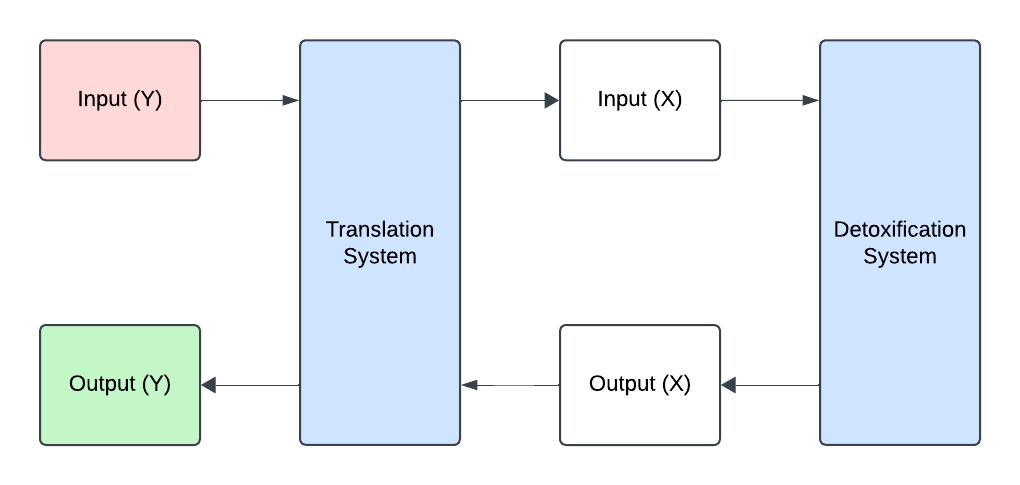

## Traducci√≥n


### Aproximaci√≥n 1 - Google translate

Nuestra primera aproximaci√≥n para este problema es utilizar la librer√≠a de Google Translate, la cual nos permite traducir todos los idiomas del dataset sin necesidad de grandes recursos computacionales.

In [19]:
translator = Translator()

def translate(text, source_lang, dest_lang):
    if source_lang == dest_lang:
        return text

    sol = translator.translate(text , src = source_lang, dest=dest_lang).text
    return sol

In [ ]:
df_numpy = df_total.to_numpy()

In [ ]:
toxic_translations = []
neutral_translations = []

for sentence in tqdm(df_numpy):
  toxic_translations.append(translate(sentence[1], sentence[0], 'en'))
  neutral_translations.append(translate(sentence[2], sentence[0], 'en'))


df_total["toxic_sentence_en"] = toxic_translations
df_total["neutral_sentence_en"] = neutral_translations

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23344/23344 [05:11<00:00, 75.05it/s] 


In [ ]:
df_total.sample(3)

source_language                                     toxic_sentence  \
8458              en  i like skinny tops & unbuttoned cover - all sh...   
8915              en                    you tweeting weird shit ! ! lol   
67                ar  ŸÖÿ∂ÿ≠ŸÉ ÿ¨ÿØÿßŸã ÿ£ŸÖÿ± ÿ®ÿπÿ∂ ÿßŸÑŸàÿßŸÅÿØŸäŸÜ ŸàŸÖŸÜ ÿ∂ŸÖŸÜŸáŸÖ ŸÖÿµÿßÿ±Ÿàÿ© ! ...   

                                       neutral_sentence  \
8458  i like skinny tops & unbuttoned cover - all sh...   
8915                       You are tweeting weird stuff   
67    ŸÖÿ∂ÿ≠ŸÉ ÿ¨ÿØÿßŸã ÿ£ŸÖÿ± ÿ®ÿπÿ∂ ÿßŸÑŸàÿßŸÅÿØŸäŸÜ ŸàŸÖŸÜ ÿ∂ŸÖŸÜŸáŸÖ ŸÖÿµÿ±ŸäŸäŸÜ! Ÿä...   

                                      toxic_sentence_en  \
8458  i like skinny tops & unbuttoned cover - all sh...   
8915                    you tweeting weird shit ! ! lol   
67    It's very funny about some of the expatriates,...   

                                    neutral_sentence_en  
8458  i like skinny tops & unbuttoned cover - all sh...  
8915                       You are tweeting weird stuff  
67    Very funny about some expatriates, including E...

In [ ]:
df_total.to_csv("./translated_sentences_google_translate.csv")

### Aproximaci√≥n 2 - facebook/m2m100_418M

La segunda aproximaci√≥n consiste en usar un modelo transformer para la traducci√≥n. Analizando los idiomas que debemos traducir probamos a usar los siguientes modelos:



*   facebook/m2m100_418M
*   facebook/nllb-200-distilled-600M

Finalmente por los resultados, nos quedamos por el primero de los dos.



In [ ]:
# Inicializar listas para las traducciones
toxic_translations = []
neutral_translations = []

# Tama√±o de batch para la traducci√≥n
batch_size = 400

for language in df_total["source_language"].unique():
    print(f"Translating sentences from {language}")
    df_language = df_total[df_total["source_language"] == language]
    toxic_sentences = df_language["toxic_sentence"].tolist()
    neutral_sentences = df_language["neutral_sentence"].tolist()

    # Si el idioma es diferente de ingl√©s, se traduce del idioma origen al ingl√©s
    if language != "en":
        # Configurar el pipeline con el idioma de origen y destino
        if(language=="zh-cn"):
          parsed_language = "zh"
        else:
          parsed_language = language

        translation_pipeline = pipeline(
            f"translation_{parsed_language}_to_en",  # La forma est√°ndar para especificar los idiomas
            model="facebook/m2m100_418M",
            device=0,
            framework="pt",  # Aseg√∫rate de usar PyTorch
            torch_dtype=torch.float16
        )

        # Crear lotes de toxic_sentences
        for i in range(0, len(toxic_sentences), batch_size):
            batch_toxic = toxic_sentences[i:i + batch_size]
            batch_neutral = neutral_sentences[i:i + batch_size]

            # Traducci√≥n en batches especificando el idioma origen y destino
            toxic_results = translation_pipeline(batch_toxic)
            neutral_results = translation_pipeline(batch_neutral)

            # Guardar solo las traducciones en las listas
            toxic_translations.extend([result["translation_text"] for result in toxic_results])
            neutral_translations.extend([result["translation_text"] for result in neutral_results])
    else:
        # Si el idioma es ingl√©s, simplemente a√±ades las frases originales
        toxic_translations.extend(toxic_sentences)
        neutral_translations.extend(neutral_sentences)

    # Aseg√∫rate de que las longitudes coincidan
    if len(toxic_translations) == len(df_language):
        df_total.loc[df_total["source_language"] == language, "toxic_sentence_en"] = toxic_translations
    else:
        print(f"Length mismatch for toxic translations in {language}")

    if len(neutral_translations) == len(df_language):
        df_total.loc[df_total["source_language"] == language, "neutral_sentence_en"] = neutral_translations
    else:
        print(f"Length mismatch for neutral translations in {language}")

    # Reiniciar las listas de traducciones para el siguiente idioma
    toxic_translations = []
    neutral_translations = []


Translating sentences from en
Translating sentences from uk
Translating sentences from ru
Translating sentences from de
Translating sentences from es
Translating sentences from am
Translating sentences from zh-cn
Translating sentences from ar
Translating sentences from hi


In [ ]:
df_total.sample(5)

source_language                                     toxic_sentence  \
3344               en  to state it mildly , i am apoplectically angry...   
6138               en  i need to take my ass to sleep so im well rest...   
7674               en                no shit ! ! rolls eyesyes i want to   
13007              en               what will it take to fix this shit ?   
8628               en  awh shit me too mhm lol so what you watching ?...   

                                        neutral_sentence  \
3344   To state it muldly , i am apoplecticlly angry ...   
6138   I need to sleep so to be prepared for tomorrow...   
7674                               I just really want to   
13007                     What will it take to fix this?   
8628   Aww me too haha so what are you watching? I fe...   

                                       toxic_sentence_en  \
3344   to state it mildly , i am apoplectically angry...   
6138   i need to take my ass to sleep so im well rest...   
7674                 no shit ! ! rolls eyesyes i want to   
13007               what will it take to fix this shit ?   
8628   awh shit me too mhm lol so what you watching ?...   

                                     neutral_sentence_en  
3344   To state it muldly , i am apoplecticlly angry ...  
6138   I need to sleep so to be prepared for tomorrow...  
7674                               I just really want to  
13007                     What will it take to fix this?  
8628   Aww me too haha so what are you watching? I fe...

In [ ]:
df_total.to_csv("./translated_sentences_m2m100.csv")

### Comparaci√≥n

Vamos a ver algunos ejemplos de las traducciones desde el espa√±ol para elegir que aproximaci√≥n elegimos. Hemos guardado los resultados de ambas aproximaciones a ficheros csv para evitar repetir todo el proceso.

In [ ]:
import random

In [ ]:
df_google_translate = pd.read_csv("./translated_sentences_google_translate.csv")
df_transformer = pd.read_csv("./translated_sentences_m2m100.csv")

In [ ]:
num_examples = 5
lenght = df_google_translate[df_google_translate['source_language'] == "es"].shape[0]

for example in range(num_examples):
  idx = random.randint(0, lenght - 1)
  print(f"FRASE ORIGINAL: {df_google_translate[df_google_translate['source_language'] == 'es'].iloc[idx]['toxic_sentence']}")
  print(f"TRADUCCI√ìN GOOGLE TRANSLATE: {df_google_translate[df_google_translate['source_language'] == 'es'].iloc[idx]['toxic_sentence_en']}")
  print(f"TRADUCCI√ìN TRANSFORMER: {df_transformer[df_transformer['source_language'] == 'es'].iloc[idx]['toxic_sentence_en']}")
  print("-" * 100)

FRASE ORIGINAL: pero este tio es un puto subnormal, o que le pasa?
TRADUCCI√ìN GOOGLE TRANSLATE: but this guy is a fucking moron, or what's wrong with him?
TRADUCCI√ìN TRANSFORMER: But this uncle is a subnormal pudding, or what happens to him?
----------------------------------------------------------------------------------------------------
FRASE ORIGINAL: Los centros de menores no tutelados son escuelas de delincuentes. 
TRADUCCI√ìN GOOGLE TRANSLATE: Centers for unattended minors are schools for delinquents.
TRADUCCI√ìN TRANSFORMER: Untouched children‚Äôs centres are criminals‚Äô schools.
----------------------------------------------------------------------------------------------------
FRASE ORIGINAL: Jueves con J de mierda
TRADUCCI√ìN GOOGLE TRANSLATE: Thursday with fucking J
TRADUCCI√ìN TRANSFORMER: Thursday with J
----------------------------------------------------------------------------------------------------
FRASE ORIGINAL: Si los ladrones y golpistas de izquierda no le hu

Como podemos ver en los ejemplos, la traducci√≥n usando Google Translate contiene menos erratas y conserva mejor la toxicidad en la frase.

### Train-test split

In [11]:
df_total = pd.read_csv("./translated_sentences_google_translate.csv")
train, test_and_val = train_test_split(df_total, train_size=0.8, random_state=33)
val, test = train_test_split(test_and_val, train_size=0.5, random_state=33)

X_train = list(train['toxic_sentence_en'])
y_train = list(train['neutral_sentence_en'])

X_val = list(val['toxic_sentence_en'])
y_val = list(val['neutral_sentence_en'])

X_test = list(test['toxic_sentence_en'])
y_test = list(test['neutral_sentence_en'])

for i,e in enumerate(y_test):
    if not isinstance(e, str):
        X_test.pop(i)
        y_test.pop(i)

## Detoxificaci√≥n

Ahora haremos un finetunning de un modelo de Huggingface para detoxificar el c√≥digo. A la hora de elegir qu√© modelo entrenariamos hemos tenido dificultades. Hemos intentado hacer el finetuning a un conjunto peque√±o de modelos para comparar los resultados.

Finalmente, por recursos computacionales, hemos tenido que quedarnos con el modelo google/flan-t5-small. Este modelo ocupa alrededor de 14 GB en memoria del total de 15 GB disponibles en Google Colab.

El resto de modelos que exploramos tenian m√°s par√°metros y por lo tanto no hemos podido realizar ning√∫n entrenamiento m√°s.

#### Creaci√≥n de los dataset

In [12]:
class DetoxificationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, target_encodings):
        self.encodings = encodings
        self.target_encodings = target_encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = self.target_encodings['input_ids'][idx].clone().detach()

        return item

Para el modelo flan-t5:

In [13]:
model_name_t5 = "google/flan-t5-small"
tokenizer_t5 = T5Tokenizer.from_pretrained(model_name_t5)

X_train_tokens_t5 = tokenizer_t5(X_train, truncation=True, padding=True, return_tensors="pt")
y_train_tokens_t5 = tokenizer_t5(y_train, truncation=True, padding=True, return_tensors="pt")

X_val_tokens_t5 = tokenizer_t5(X_val, truncation=True, padding=True, return_tensors="pt")
y_val_tokens_t5 = tokenizer_t5(y_val, truncation=True, padding=True, return_tensors="pt")

X_test_tokens_t5 = tokenizer_t5(X_test, truncation=True, padding=True, return_tensors="pt")
y_test_tokens_t5 = tokenizer_t5(y_test, truncation=True, padding=True, return_tensors="pt")

train_dataset_t5 = DetoxificationDataset(X_train_tokens_t5, y_train_tokens_t5)
val_dataset_t5 = DetoxificationDataset(X_val_tokens_t5, y_val_tokens_t5)
test_dataset_t5 = DetoxificationDataset(X_test_tokens_t5, y_test_tokens_t5)


print("Tama√±o del dataset de entrenamiento para el modelo FLAN-T5:", len(train_dataset_t5))
print("Ejemplo del dataset:", train_dataset_t5[0])


Tama√±o del dataset de entrenamiento para el modelo FLAN-T5: 18675
Ejemplo del dataset: {'input_ids': tensor([    3,    32,   107,   168,     3,     6,  2763,  8581,  5839,    13,
          175, 25851,   447,  8479,  1052,     8, 13256,    24,  1052,     3,
            6,    43, 11518,     3,     5,     1,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     

Para el modelo BART:

In [ ]:
model_name_bart = "facebook/bart-base"
tokenizer_bart = BartTokenizer.from_pretrained(model_name_bart)

X_train_tokens_bart = tokenizer_bart(X_train, truncation=True, padding=True, return_tensors="pt")
y_train_tokens_bart = tokenizer_bart(y_train, truncation=True, padding=True, return_tensors="pt")

X_val_tokens_bart = tokenizer_bart(X_val, truncation=True, padding=True, return_tensors="pt")
y_val_tokens_bart = tokenizer_bart(y_val, truncation=True, padding=True, return_tensors="pt")

X_test_tokens_bart = tokenizer_bart(X_test, truncation=True, padding=True, return_tensors="pt")
y_test_tokens_bart = tokenizer_bart(y_test, truncation=True, padding=True, return_tensors="pt")

train_dataset_bart = DetoxificationDataset(X_train_tokens_bart, y_train_tokens_bart)
val_dataset_bart = DetoxificationDataset(X_val_tokens_bart, y_val_tokens_bart)
test_dataset_bart = DetoxificationDataset(X_test_tokens_bart, y_test_tokens_bart)


print("Tama√±o del dataset de entrenamiento para el modelo BART:", len(train_dataset_bart))
print("Ejemplo del dataset:", train_dataset_bart[0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Tama√±o del dataset de entrenamiento para el modelo BART: 18675
Ejemplo del dataset: {'input_ids': tensor([    0,  2678,   157,  2156,  3392,  9069,  4146,     9,   209, 13561,
        26842,  5086,   948,     5,  6820,    14,   948,  2156,    33,  5826,
          479,     2,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1, 

## Entrenamiento

In [ ]:
class LossTrackerCallback(TrainerCallback):
    def __init__(self):
        super().__init__()
        self.loss_values = []  # Almacena los valores de loss

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.loss_values.append((state.global_step, logs["loss"]))  # Guarda (step, loss)

    def plot_loss(self):
        steps, losses = zip(*self.loss_values)
        plt.figure(figsize=(10, 6))
        plt.plot(steps, losses, label="Training Loss")
        plt.xlabel("Step")
        plt.ylabel("Loss")
        plt.title("Loss Evolution During Training")
        plt.legend()
        plt.grid()
        plt.show()

Se define el modelo flan-t5 y se congelan todos los parametros excepto los de las 3 √∫ltimas capas

In [ ]:

model_t5 = T5ForConditionalGeneration.from_pretrained(model_name_t5)

model_t5.config.task_specific_params={
    "neutralization": {
      "early_stopping": True,
      "length_penalty": 2.0,
      "max_length": 100,
      "min_length": 50,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "neutralize: "
    }
}

num_training_layers = 3 # El n√∫mero de capas que se entrenar√°n

# Congelar todos los par√°metros del modelo
for param in model_t5.parameters():
    param.requires_grad = False

# Descongelar las √∫ltimas n capas del decoder
for param in model_t5.decoder.block[-num_training_layers:].parameters():
    param.requires_grad = True

# Mantener la capa de salida (`lm_head`) entrenable
for param in model_t5.lm_head.parameters():
    param.requires_grad = True

total_params = sum(p.numel() for p in model_t5.parameters())
trainable_params = sum(p.numel() for p in model_t5.parameters() if p.requires_grad)

print("ESTAD√çSTICAS DEL ENTRENAMIENTO:")
print(f"Total de par√°metros: {total_params:,}")
print(f"Par√°metros entrenables: {trainable_params:,}")
print(f"Par√°metros congelados: {total_params - trainable_params:,}")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

ESTAD√çSTICAS DEL ENTRENAMIENTO:
Total de par√°metros: 76,961,152
Par√°metros entrenables: 25,891,328
Par√°metros congelados: 51,069,824


Se hace lo mismo para el modelo BART

In [ ]:
model_bart = BartForConditionalGeneration.from_pretrained(model_name_bart)

# Configurar par√°metros espec√≠ficos de la tarea (opcional)
model_bart.config.task_specific_params = {
    "neutralization": {
        "early_stopping": True,
        "length_penalty": 2.0,
        "max_length": 100,
        "min_length": 50,
        "no_repeat_ngram_size": 3,
        "num_beams": 4,
        "prefix": "neutralize: "
    }
}

# N√∫mero de capas del decoder a entrenar
num_training_layers = 3

# Congelar todos los par√°metros del modelo
for param in model_bart.parameters():
    param.requires_grad = False

# Descongelar las √∫ltimas n capas del decoder
for layer in model_bart.model.decoder.layers[-num_training_layers:]:
    for param in layer.parameters():
        param.requires_grad = True

# Mantener la capa de salida (`lm_head`) entrenable
for param in model_bart.lm_head.parameters():
    param.requires_grad = True

# Calcular estad√≠sticas
total_params = sum(p.numel() for p in model_bart.parameters())
trainable_params = sum(p.numel() for p in model_bart.parameters() if p.requires_grad)

print("ESTAD√çSTICAS DEL ENTRENAMIENTO:")
print(f"Total de par√°metros: {total_params:,}")
print(f"Par√°metros entrenables: {trainable_params:,}")
print(f"Par√°metros congelados: {total_params - trainable_params:,}")


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

ESTAD√çSTICAS DEL ENTRENAMIENTO:
Total de par√°metros: 139,420,416
Par√°metros entrenables: 66,958,848
Par√°metros congelados: 72,461,568


### Entrenamiento para FLAN-T5

In [ ]:
training_args_t5 = Seq2SeqTrainingArguments(
    output_dir='./checkpoints-t5',
    # evaluation_strategy="no",
    # evaluation_strategy="epoch",
    evaluation_strategy="steps",
    logging_steps = 20,
    eval_steps=146*5, # cada 5 epochs, teniendo batches de 128
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    learning_rate=2e-4,
    num_train_epochs=25,  # lo maximo intentando no superar el l√≠mite de tiempo de google colab
    report_to=["none"], # para no pedir login de 'wandb' y otros
    # fp16=True, # acelera el entrenaminento pero lo empeora
)

loss_tracker_t5 = LossTrackerCallback()

trainer_t5 = Seq2SeqTrainer(
    model=model_t5,
    args=training_args_t5,
    train_dataset=train_dataset_t5,
    eval_dataset=val_dataset_t5,
     callbacks=[loss_tracker_t5],
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


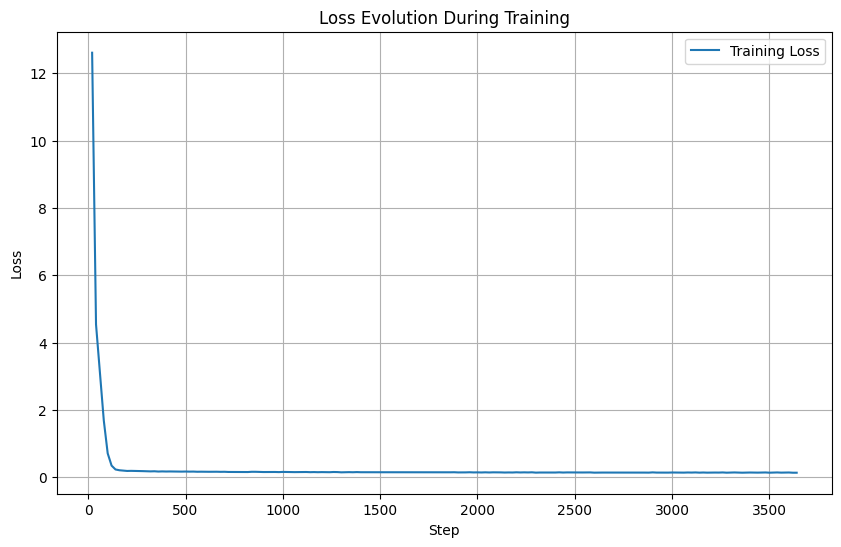

In [ ]:
trainer_t5.train()
loss_tracker_t5.plot_loss()

In [ ]:
#guardar
model_t5.save_pretrained("t5-detox_model")

### Entrenamiento para BART

In [ ]:
#torch.cuda.empty_cache()

training_args_bart = Seq2SeqTrainingArguments(
    output_dir='./checkpoints-bart',
    # evaluation_strategy="no",
    # evaluation_strategy="epoch",
    evaluation_strategy="steps",
    logging_steps = 20,
    eval_steps=146*5, # cada 5 epochs, teniendo batches de 128
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    learning_rate=2e-4,
    num_train_epochs=25,  # lo maximo intentando no superar el l√≠mite de tiempo de google colab
    report_to=["none"], # para no pedir login de 'wandb' y otros
    # fp16=True, # acelera el entrenaminento pero lo empeora
)

loss_tracker_bart = LossTrackerCallback()

trainer_bart = Seq2SeqTrainer(
    model=model_bart,
    args=training_args_bart,
    train_dataset=train_dataset_bart,
    eval_dataset=val_dataset_bart,
     callbacks=[loss_tracker_bart],
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer_bart.train()
loss_tracker_bart.plot_loss()

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.54 GiB. GPU 0 has a total capacity of 14.75 GiB of which 23.06 MiB is free. Process 3600 has 14.72 GiB memory in use. Of the allocated memory 14.29 GiB is allocated by PyTorch, and 316.06 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
trainer_bart.predict(test_dataset=test_dataset_bart).metrics

In [ ]:
#guardar
model_bart.save_pretrained("bart-detox_model")

## Prueba del modelo

In [ ]:
#cargar y probar
loaded_model = T5ForConditionalGeneration.from_pretrained("t5-detox_model")
loaded_model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo): 

In [ ]:
def detoxify_sentence(sentence, language, tokenizer):
  print(f"FRASE ORIGINAL: {sentence}")
  translated_sentence = translate(sentence, language, 'en')
  input_ids = tokenizer(translated_sentence, return_tensors="pt").input_ids.to(device)
  outputs = loaded_model.generate(input_ids)
  detoxified_sentence = tokenizer.decode(outputs[0], skip_special_tokens=True)
  translated_detoxified_sentence = translate(detoxified_sentence, 'en', language)
  print(f"FRASE DETOXIFICADA: {translated_detoxified_sentence}")
  return translated_detoxified_sentence

In [ ]:
sample = df_total[df_total["source_language"] == 'es'].sample(1)
toxic_sentence = sample['toxic_sentence'].iloc[0]
source_language = sample['source_language'].iloc[0]

detoxify_sentence(toxic_sentence, source_language, tokenizer_t5);

FRASE ORIGINAL: La puta que frustraci√≥n .
FRASE DETOXIFICADA: La persona, qu√© problema.


In [ ]:
sample = df_total[df_total["source_language"] == 'en'].sample(1)
toxic_sentence = sample['toxic_sentence'].iloc[0]
source_language = sample['source_language'].iloc[0]

detoxify_sentence(toxic_sentence, source_language, tokenizer_t5);

FRASE ORIGINAL: hamas alone can 't even get their shit together to be 'one side'
FRASE DETOXIFICADA: Hamas alone can't even get their things together to be 'one side'


## Evaluaci√≥n

Vamos a seguir la misma evaluaci√≥n usada en PAN. Para esto tendremos que ejecutar el proceso de detoxificaci√≥n sobre el dataset de test.

Sobre las salidas tendremos que medir 3 variables usando el c√≥digo proporcionado:
- Style Transfer Accuracy: Medir el nivel de no-toxicidad.
- Content Preservation: Comparar si la frase de salida mantiene el significado de la frase original.
- Fluency: Medir la adecuaci√≥n del texto y su similaridad a las referencias escritas por humanos.

Estas tres m√©tricas devolver√°n valores entre 0 y 1. Al multiplicar estos tres valores obtendremos la puntuaci√≥n global.

El c√≥digo para estas m√©tricas es proporcionado por PAN.

### Ejecuci√≥n sobre el conjunto de test

In [ ]:
print(X_test[:1])
print(y_test[:1])
print(X_test_tokens_t5[:1])
print(y_test_tokens_t5[:1])

['i was thinkin the same shit']
['i was thinking the same way']
{'input_ids': tensor([[    3,    23,    47,   317,    77,     8,   337,     3,     7, 10536,
             1,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [39]:
loaded_model = T5ForConditionalGeneration.from_pretrained("t5-detox_model")
loaded_model.to(device)
X_test_tokens_t5 = X_test_tokens_t5.to(device)

In [15]:
# Generar predicci√≥n
outputs = loaded_model.generate(X_test_tokens_t5["input_ids"])

# Decodificar las predicciones a texto legible
decoded_outputs = tokenizer_t5.batch_decode(outputs, skip_special_tokens=True)

print("Predicci√≥nes del conjuto de test:", decoded_outputs)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Predicci√≥nes del conjuto de test: ['I was thinkin the same thing', 'sure, see you later', 'citizens keeps voting in the same political party giving the same results over and over again .', 'people woah * * calm * * down sailor .', 'then we wont have to hear from this guy or the transgenders again .', 'This sort of thing happens everywhere in every culture and country.', 'why are a lot of these comments defending this guy ?', 'I want him...for a short time...but this Bavarian is really a', 'This is not true female boxing. True female boxing scolded Gu A', 'Idk all I know is today is Friday', 'Egyptian commentators include beggars, halafites, and shara', 'Maybe blacks should be thankful for their good fortune!', 'Can someone explain to these jurors that the days of free money are over .', 'We are jealous of our sexy tweets', 'No batshit crazy animal rights activists here to complain?', 'He should be beaten mercilessly every day he has left of his miserable life.', 'A lot of my friends f

In [32]:
# Crea el DataFrame de test
df_test = pd.DataFrame({
    "source_language": list(test['source_language']),
    "X_test": list(test['toxic_sentence']),
    "X_test_en": X_test,
    "y_test_en": y_test,
    "y_test": list(test['neutral_sentence']),
    "y_pred_en": decoded_outputs,
})


In [34]:
df_test.sample(5)

source_language                                             X_test  \
2021              ru             –∫–æ—à–º–∞—Ä, —Ä—É–∫–∏ –±—ã –æ—Ç–æ—Ä–≤–∞—Ç—å. –ø—Ä–∏–¥—É—Ä–∫–∏ .:o   
642               en  yeah man warm temperatures in a warm environme...   
1979              en                         why should i give a fuck !   
63                en                             i flag all that shit .   
1512              en       and that is one profoundly fucked up story .   

                                              X_test_en  \
2021  It's a nightmare, I could tear my hands off. a...   
642   yeah man warm temperatures in a warm environme...   
1979                         why should i give a fuck !   
63                               i flag all that shit .   
1512       and that is one profoundly fucked up story .   

                                       y_test_en  \
2021                                   terrible!   
642   global warming is affecting climate change   
1979                     Why do I have to worry?   
63                        I flag all that stuff.   
1512      and that is one profoundly bad story .   

                                          y_test  \
2021                                     —É–∂–∞—Å–Ω–æ!   
642   global warming is affecting climate change   
1979                     Why do I have to worry?   
63                        I flag all that stuff.   
1512      and that is one profoundly bad story .   

                                              y_pred_en  
2021       It's a nightmare, I could tear my hands off.  
642   Yeah man warm temperatures in a warm environme...  
1979                                 Why should I care?  
63                               I flag all that stuff.  
1512            And that is one profoundly wrong story.

In [35]:
df_test_numpy = df_test.to_numpy()

prediction_translations = []

for sentence in tqdm(df_test_numpy):
  prediction_translations.append(translate(sentence[3], 'en', sentence[0]))

df_test["y_pred"] = prediction_translations

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2335/2335 [00:33<00:00, 69.47it/s]


In [36]:
df_test.sample(3)

source_language                                             X_test  \
1626              en  they won 't but egypt is shit for everybody ri...   
729               ru                        —É–∞—Ö–∞—Ö–∞, —Å—É–∫. —á–µ–ª, —Ç—ã –≥–µ–Ω–∏–π.   
1269              en  u see me mad right n just fuckin talkin like r...   

                                              X_test_en  \
1626  they won 't but egypt is shit for everybody ri...   
729                   wow, bitch. man, you're a genius.   
1269  u see me mad right n just fuckin talkin like r...   

                                              y_test_en  \
1626  They won't, but Egypt is not that good for eve...   
729                          wow man, you are a genius.   
1269  u see me mad right n just talkin like really t...   

                                                 y_test  \
1626  They won't, but Egypt is not that good for eve...   
729                          —É–∞—Ö–∞—Ö–∞, —á–µ–ª–æ–≤–µ–∫, —Ç—ã –≥–µ–Ω–∏–π.   
1269  u see me mad right n just talkin like really t...   

                                              y_pred_en  \
1626  they won't but egypt is bad for everybody righ...   
729                               Wow, you're a genius.   
1269  You see me mad right and just talkin like real...   

                                                 y_pred  
1626  They won't, but Egypt is not that good for eve...  
729                                –≤–∞—É —á—É–≤–∞–∫, —Ç—ã –≥–µ–Ω–∏–π.  
1269  u see me mad right n just talkin like really t...

In [37]:
# Guardar los resultados
df_test["X_test"].to_json("input.jsonl", orient="records", lines=True)
df_test["y_test"].to_json("references.jsonl", orient="records", lines=True)
df_test["y_pred"].to_json("predictions.jsonl", orient="records", lines=True)

### Evaluaci√≥n

In [40]:
#Eliminar el modelo de detoxificacion para limpiar la memoria
import gc

loaded_model.to('cpu')
del loaded_model
gc.collect()
torch.cuda.empty_cache()

In [72]:


def prepare_target_label(
    model: AutoModelForSequenceClassification, target_label: Union[int, str]
) -> int:
    """
    Prepare the target label to ensure it is valid for the given model.

    Args:
        model (AutoModelForSequenceClassification): Text classification model.
        target_label (Union[int, str]): The target label to prepare.

    Returns:
        int: The prepared target label.

    Raises:
        ValueError: If the target_label is not found in model labels or ids.
    """
    if target_label in model.config.id2label:
        pass
    elif target_label in model.config.label2id:
        target_label = model.config.label2id.get(target_label)
    elif (
        isinstance(target_label, str)
        and target_label.isnumeric()
        and int(target_label) in model.config.id2label
    ):
        target_label = int(target_label)
    else:
        raise ValueError(
            f'target_label "{target_label}" not in model labels or ids: {model.config.id2label}.'
        )
    assert isinstance(target_label, int)
    return target_label

def classify_texts(
    model: AutoModelForSequenceClassification,
    tokenizer: AutoTokenizer,
    texts: List[str],
    target_label: Union[int, str],
    second_texts: Optional[List[str]] = None,
    batch_size: int = 32,
    raw_logits: bool = False,
    desc: Optional[str] = "Calculating STA scores",
) -> npt.NDArray[np.float64]:
    """
    Classify a list of texts using the given model and tokenizer.

    Args:
        model (AutoModelForSequenceClassification): Text classification model.
        tokenizer (AutoTokenizer): The tokenizer corresponding to the model.
        texts (List[str]): List of texts to classify.
        target_label (Union[int, str]): The target label for classification.
        second_texts (Optional[List[str]]): List of secondary texts (not needed by default).
        batch_size (int): Batch size for inference.
        raw_logits (bool): Whether to return raw logits instead of probs.
        desc (Optional[str]): Description for tqdm progress bar.

    Returns:
        npt.NDArray[np.float64]: Array of classification scores for the texts.
    """

    target_label = prepare_target_label(model, target_label)

    res = []

    for i in trange(0, len(texts), batch_size, desc=desc):
        inputs = [texts[i : i + batch_size]]

        if second_texts is not None:
            inputs.append(second_texts[i : i + batch_size])
        inputs = tokenizer(
            *inputs,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=512,
        ).to(model.device)

        with torch.no_grad():
            try:
                logits = model(**inputs).logits
                if raw_logits:
                    preds = logits[:, target_label]
                elif logits.shape[-1] > 1:
                    preds = torch.softmax(logits, -1)[:, target_label]
                else:
                    preds = torch.sigmoid(logits)[:, 0]
                preds = preds.cpu().numpy()
            except:
                print(i, i + batch_size)
                preds = [0] * len(inputs)
        res.append(preds)
    return np.concatenate(res)

def evaluate_sta(
    model: AutoModelForSequenceClassification,
    tokenizer: AutoTokenizer,
    texts: List[str],
    target_label: int = 0,  # 1 is polite, 0 is toxic
    batch_size: int = 32,
) -> npt.NDArray[np.float64]:
    """
    Evaluate the STA of a list of texts using the given model and tokenizer.

    Args:
        model (AutoModelForSequenceClassification): Text classification model.
        tokenizer (AutoTokenizer): The tokenizer corresponding to the model.
        texts (List[str]): List of texts to evaluate.
        target_label (int): The target label for style evaluation.
        batch_size (int): Batch size for inference.

    Returns:
        npt.NDArray[np.float64]: Array of STA scores for the texts.
    """
    target_label = prepare_target_label(model, target_label)
    scores = classify_texts(
        model, tokenizer, texts, target_label, batch_size=batch_size, desc="Style"
    )

    return scores

def evaluate_sim(
    model: SentenceTransformer,
    original_texts: List[str],
    rewritten_texts: List[str],
    batch_size: int = 32,
    efficient_version: bool = False,
) -> npt.NDArray[np.float64]:
    """
    Evaluate the semantic similarity between original and rewritten texts.
    Note that the subtraction is done due to the implementation of the `cosine` metric in `scipy`.
    For more details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html

    Args:
        model (SentenceTransformer): The sentence transformer model.
        original_texts (List[str]): List of original texts.
        rewritten_texts (List[str]): List of rewritten texts.
        batch_size (int): Batch size for inference.
        efficient_version (bool): To use efficient calculation method.

    Returns:
        npt.NDArray[np.float64]: Array of semantic similarity scores between \
              original and rewritten texts.
    """
    similarities = []

    batch_size = min(batch_size, len(original_texts))
    for i in trange(0, len(original_texts), batch_size, desc="Calculating SIM scores"):
        original_batch = original_texts[i : i + batch_size]
        rewritten_batch = rewritten_texts[i : i + batch_size]

        embeddings = model.encode(original_batch + rewritten_batch)
        original_embeddings = embeddings[: len(original_batch)]
        rewritten_embeddings = embeddings[len(original_batch) :]

        if efficient_version:
            similarity_matrix = np.dot(original_embeddings, rewritten_embeddings.T)
            original_norms = np.linalg.norm(original_embeddings, axis=1)
            rewritten_norms = np.linalg.norm(rewritten_embeddings, axis=1)
            similarities.extend(
                1
                - similarity_matrix / (np.outer(original_norms, rewritten_norms) + 1e-9)
            )
        else:
            t = [
                1 - cosine(original_embedding, rewritten_embedding)
                for original_embedding, rewritten_embedding in zip(
                    original_embeddings, rewritten_embeddings
                )
            ]
            similarities.extend(t)
    return similarities

def evaluate_style_transfer(
    original_texts: List[str],
    rewritten_texts: List[str],
    style_model: AutoModelForSequenceClassification,
    style_tokenizer: AutoTokenizer,
    meaning_model: SentenceTransformer,
    references: Optional[List[str]] = None,
    style_target_label: int = 0,
    batch_size: int = 32,
) -> Dict[str, np.ndarray]:

    accuracy = evaluate_sta(
        style_model,
        style_tokenizer,
        rewritten_texts,
        target_label=style_target_label,
        batch_size=batch_size,
    )

    similarity = evaluate_sim(
        model=meaning_model,
        original_texts=original_texts,
        rewritten_texts=rewritten_texts,
        batch_size=batch_size,
    )

    result = {
        "STA": accuracy,
        "SIM": similarity,
    }

    if references is not None:

        chrf = CHRF()

        result["CHRF"] = np.array(
            [
                chrf.sentence_score(hypothesis=rewritten, references=[reference]).score
                / 100
                for rewritten, reference in zip(rewritten_texts, references)
            ],
            dtype=np.float64,
        )

        result["J"] = result["STA"] * result["SIM"] * result["CHRF"]

    return result


def load_model(
    model_name: Optional[str] = None,
    model_class: Optional[Callable] = None,
    use_cuda: bool = True,
) -> Union[AutoModelForSequenceClassification, SentenceTransformer, AutoTokenizer]:
    if model_name == "sentence-transformers/LaBSE":
        return SentenceTransformer(model_name)
    model = model_class.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    if use_cuda and torch.cuda.is_available():
        model.cuda()
    return model, tokenizer

def run_evaluation(
    input_data: pd.DataFrame,
    predictions: pd.DataFrame,
    golden_data: Optional[pd.DataFrame] = None,
    style_model_name: str = "textdetox/xlmr-large-toxicity-classifier",
    meaning_model_name: str = "sentence-transformers/LaBSE",
    style_target_label: int = 0,
    batch_size: int = 32,
    use_cuda: bool = True,
) -> Dict[str, np.ndarray]:
    style_model, style_tokenizer = load_model(
        style_model_name, AutoModelForSequenceClassification, use_cuda=use_cuda
    )
    meaning_model = load_model(meaning_model_name, SentenceTransformer, use_cuda=use_cuda)

    # Prepare data
    input_texts = input_data["input"].tolist()
    prediction_texts = predictions["prediction"].tolist()
    references = golden_data["reference"].tolist() if golden_data is not None else None

    # Run evaluation
    return evaluate_style_transfer(
        original_texts=input_texts,
        rewritten_texts=prediction_texts,
        references=references,
        style_model=style_model,
        style_tokenizer=style_tokenizer,
        meaning_model=meaning_model,
        style_target_label=style_target_label,
        batch_size=batch_size,
    )

In [73]:
df_input = pd.read_json("input.jsonl", lines=True)
df_input.rename(columns={0: "input"}, inplace=True)
df_prediction = pd.read_json("predictions.jsonl", lines=True)
df_prediction.rename(columns={0: "prediction"}, inplace=True)
df_golden = pd.read_json("references.jsonl", lines=True)
df_golden.rename(columns={0: "reference"}, inplace=True)
results = run_evaluation(df_input, df_prediction, golden_data=df_golden)
print(results)

Style:   0%|          | 0/73 [00:00<?, ?it/s]

Calculating SIM scores:   0%|          | 0/73 [00:00<?, ?it/s]

{'STA': array([0.9997199 , 0.9996854 , 0.9996619 , ..., 0.00153588, 0.8772176 ,
       0.99945086], dtype=float32), 'SIM': [0.9035031256971896, 0.8705184045897523, 0.9527056217193604, 0.4609981179237366, 0.7216010093688965, 0.9415757094874572, 0.9468674032013077, 0.8553410172462463, 0.6732548280510215, 0.9684576410974495, 0.5701444149017334, 0.9798957401482986, 0.9684087038040161, 0.84244704246521, 0.903021687449319, 0.3635607361793518, 0.8139681351752435, 0.8816405605292001, 0.9712024348257539, 0.9337350408355908, 0.9644886276430726, 0.7187512516975403, 0.5070714648323387, 0.7751201853227739, 0.95649653673172, 0.9332029183627931, 0.9869619902063014, 0.8772636578836253, 0.7141361662230603, 0.5847213268280029, 0.8758896776339159, 0.6426303386688232, 0.7483260481551928, 0.84006960153165, 0.7874100208282471, 0.6268230303035371, 0.7240445829643188, 0.6668702562710722, 0.883941650390625, 0.8388673759181886, 0.38826075196266174, 0.9818257678643344, 0.9687981605529785, 0.7828607559204102, 0.8

In [74]:
df_test['STA'] = results['STA']
df_test['SIM'] = results['SIM']
df_test['CHRF'] = results['CHRF']
df_test['J'] = results['J']

In [75]:
df_test.sample(5)

source_language                                             X_test  \
2254              en                      god , talk about a shit job .   
837               en  i had no vote or voice in electing the people ...   
417               en  can we just go back to oos already and be done...   
1432              en                     butt ass naked jus cuz its hot   
339               en     the irs can 't find their own fucking emails .   

                                              X_test_en  \
2254                      god , talk about a shit job .   
837   i had no vote or voice in electing the people ...   
417   can we just go back to oos already and be done...   
1432                     butt ass naked jus cuz its hot   
339      the irs can 't find their own fucking emails .   

                                              y_test_en  \
2254                              Talk about a bad job.   
837   I had no vote or voice in electing the people ...   
417   can we just go back to oos already and be done...   
1432                              naked jus cuz its hot   
339                 The irs can't find their own emails   

                                                 y_test  \
2254                              Talk about a bad job.   
837   I had no vote or voice in electing the people ...   
417   can we just go back to oos already and be done...   
1432                              naked jus cuz its hot   
339                 The irs can't find their own emails   

                                              y_pred_en  \
2254                       god , talk about a bad job .   
837   I had no vote or voice in electing the people ...   
417   Can you just go back to oos already and be don...   
1432                         Butt naked jus cuz its hot   
339                The irs can't find their own emails.   

                                                 y_pred       STA       SIM  \
2254                              Talk about a bad job.  0.998925  0.696039   
837   I had no vote or voice in electing the people ...  0.999591  0.934000   
417   can we just go back to oos already and be done...  0.998772  0.864112   
1432                              naked jus cuz its hot  0.000358  0.893268   
339                 The irs can't find their own emails  0.935063  0.910550   

      CHRF         J  
2254   1.0  0.695291  
837    1.0  0.933618  
417    1.0  0.863050  
1432   1.0  0.000320  
339    1.0  0.851422

COMBINED AVERAGE SCORE:
0.6748444608800811
--------------------------------------------------


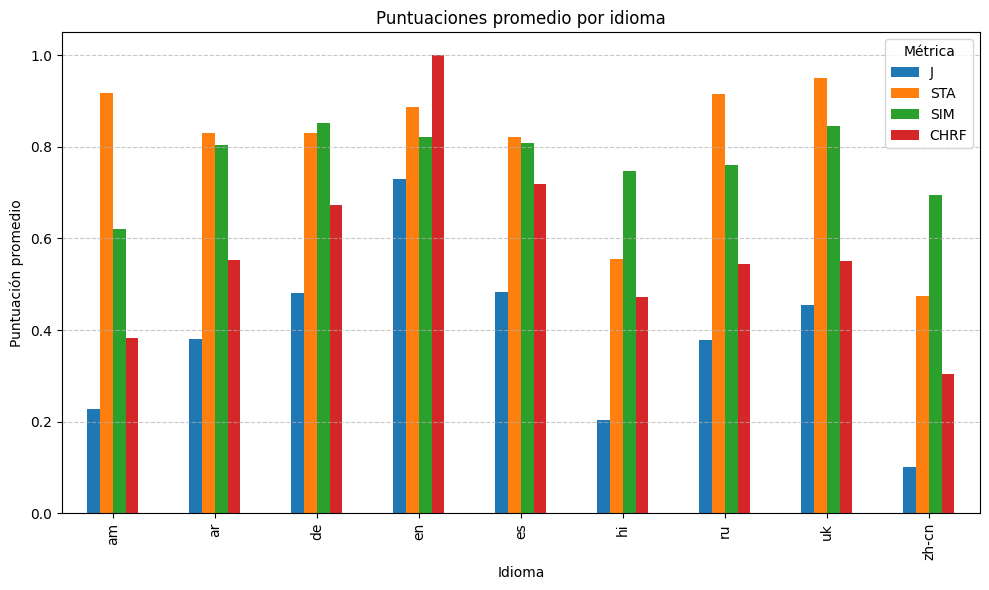

In [76]:
average_leaderboard_score = df_test['J'].mean()
print("COMBINED AVERAGE SCORE:")
print(average_leaderboard_score)
print("-" * 50)

results = {
    'source_language': [],
    'J': [],
    'STA': [],
    'SIM': [],
    'CHRF': []
}

for language in df_test['source_language'].unique():
    results['source_language'].append(language)
    results['J'].append(df_test[df_test['source_language'] == language]['J'].mean())
    results['STA'].append(df_test[df_test['source_language'] == language]['STA'].mean())
    results['SIM'].append(df_test[df_test['source_language'] == language]['SIM'].mean())
    results['CHRF'].append(df_test[df_test['source_language'] == language]['CHRF'].mean())

df_results = pd.DataFrame(results)

grouped = df_results.groupby('source_language')[['J', 'STA', 'SIM', 'CHRF']].mean()

grouped.plot(kind='bar', figsize=(10, 6))

plt.title("Puntuaciones promedio por idioma")
plt.xlabel("Idioma")
plt.ylabel("Puntuaci√≥n promedio")
plt.legend(title="M√©trica")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Conclusiones

Viendo el ranking de la competici√≥n nuestro resultado habr√≠a quedado en novena posici√≥n. Podemos ver que el ingl√©s es el idioma donde mejor puntuaci√≥n obtenemos, debido a que evitamos el proceso de traducci√≥n y tenemos una mayor cantidad de datos al usar el dateset extra. Es posible que sin usar este dataset extra, el proceso de entrenamiento hubiese sido peor comparado con usar solo el dataset de la competici√≥n, pero hemos hecho todo lo posible por maximizar los resultados.